In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from gzip import GzipFile

In [2]:
lr_dir = Path('/home/ajc/Documents/terrain-classification/image-data/01-single-rgb/')
dp_dir = Path('/home/ajc/Documents/terrain-classification/image-data/02-disparity-maps/')

out_dir = Path('/home/ajc/Documents/terrain-classification/image-data/05-lr-disparity-combo/')

img_classes = ['high', 'medium', 'low']

total_num_images = 0
count = 0

for clss in img_classes:
    
    img_fnames_left = sorted((lr_dir / clss).glob('*eft-[0-9]*.jpg'))
    img_fnames_right = sorted((lr_dir / clss).glob('*ight-[0-9]*.jpg'))
    img_fnames_disp = sorted((dp_dir / clss).glob('*eft-[0-9]*.jpg'))
    
    print(clss, len(img_fnames_left), len(img_fnames_right), len(img_fnames_disp))
    total_num_images += len(img_fnames_right)
    
    out_dir_class = out_dir / clss
    out_dir_class.mkdir(parents=True, exist_ok=True)

    for fname_left, fname_right, fname_disp in zip(img_fnames_left, img_fnames_right, img_fnames_disp):

#         print(fname_disp.name)
#         print(fname_left.name)
#         print(fname_right.name)
#         print()
#         continue
        
        img_left = plt.imread(str(fname_left))
        img_right = plt.imread(str(fname_right))
        
        img_disp = plt.imread(str(fname_disp))
        img_disp = np.expand_dims(img_disp, -1)
        
        out_fname = fname_left.name
        out_fpath = out_dir_class / out_fname
        
        img_stacked = np.concatenate([img_left, img_right, img_disp], axis=-1)

        with GzipFile(out_fpath.with_suffix('.npy.gz'), 'w') as out_file:
            np.save(out_file, img_stacked)
            count += 1
            
#         break
#     break
print(total_num_images, count)

print(img_stacked.shape, img_left.shape)

high 2344 2344 2344
medium 1933 1933 1933
low 1609 1609 1609
5886 5886
(400, 400, 7) (400, 400, 3)


In [53]:
tmp = (out_dir/'high').glob('*.gz')
with GzipFile(next(tmp), 'r') as in_file:
    img_stacked_in = np.load(in_file)

In [56]:
# (img_stacked_in == img_stacked)
img_stacked.shape, img_stacked_in.shape

((400, 400, 6), (400, 400, 3, 2))

In [50]:
np.concatenate([img_left, img_right], axis=-1).shape

(400, 400, 6)

In [44]:
import cv2
a = cv2.imread(str(fname_left), cv2.IMREAD_GRAYSCALE)
a.shape

(400, 400)

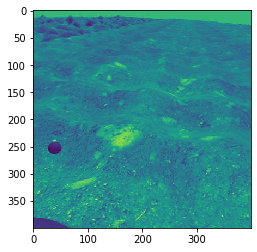

In [43]:
plt.imshow(a)

In [48]:
from fastai.vision import *

pil2tensor(np.stack([a, a], axis=-1), np.float32).shape

torch.Size([2, 400, 400])

In [51]:
pil2tensor(np.concatenate([img_left, img_right], axis=-1), np.float32).shape

torch.Size([6, 400, 400])

In [3]:
lr_dir = Path('/home/ajc/Documents/terrain-classification/image-data/grass/1-rgb/')
dp_dir = Path('/home/ajc/Documents/terrain-classification/image-data/grass/2-dsp/')

out_dir = Path('/home/ajc/Documents/terrain-classification/image-data/grass/5-rgb-disparity/')

img_classes = ['high', 'medium', 'low']

total_num_images = 0
count = 0

for clss in img_classes:
    
    img_fnames_left = sorted((lr_dir / clss / 'left').glob('*.jpg'))
    img_fnames_right = sorted((lr_dir / clss / 'right').glob('*.jpg'))
    img_fnames_disp = sorted((dp_dir / clss).glob('*.jpg'))
    
    print(clss, len(img_fnames_left), len(img_fnames_right), len(img_fnames_disp))
    total_num_images += len(img_fnames_right)
    
    out_dir_class = out_dir / clss
    out_dir_class.mkdir(parents=True, exist_ok=True)

    for fname_left, fname_right, fname_disp in zip(img_fnames_left, img_fnames_right, img_fnames_disp):

#         print(fname_disp.name)
#         print(fname_left.name)
#         print(fname_right.name)
#         print()
#         continue
        
        img_left = plt.imread(str(fname_left))
        img_right = plt.imread(str(fname_right))
        
        img_disp = plt.imread(str(fname_disp))
        img_disp = np.expand_dims(img_disp, -1)
        
        out_fname = fname_left.name
        out_fpath = out_dir_class / out_fname
        
        img_stacked = np.concatenate([img_left, img_right, img_disp], axis=-1)

        with GzipFile(out_fpath.with_suffix('.npy.gz'), 'w') as out_file:
            np.save(out_file, img_stacked)
            count += 1
            
#         break
#     break
print(total_num_images, count)

print(img_stacked.shape, img_left.shape)

high 284 284 284
medium 295 295 295
low 295 295 295
874 874
(400, 400, 7) (400, 400, 3)
